<a href="https://colab.research.google.com/github/tfysekis/Cluster-Craft-Data-Exploration/blob/main/ClusterCraft_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 : Partitioning clustering with k-means

## 2.1. Application to the iris dataset

**Step 1: Load the Iris Dataset**

First, we'll load the Iris dataset using the sklearn.datasets module. This dataset includes measurements like sepal length, sepal width, petal length, and petal width of three different species of iris flowers.



In [ ]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = iris.data


**Step 2: Apply K-Means Clustering**

Next, we will apply the K-Means clustering algorithm to find three clusters within the dataset. We will initially use only the last two features (petal length and petal width) for simplicity and better visualization capabilities.



In [ ]:
from sklearn.cluster import KMeans

# Use only the last two features for initial clustering
X = data[:, [2, 3]]
k = 3  # Number of clusters

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(X)

# Extract labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

**Step 3: Visualization of Clusters**

We'll create a plot to visualize the data points and the centroids of the clusters to understand how the observations have been grouped.

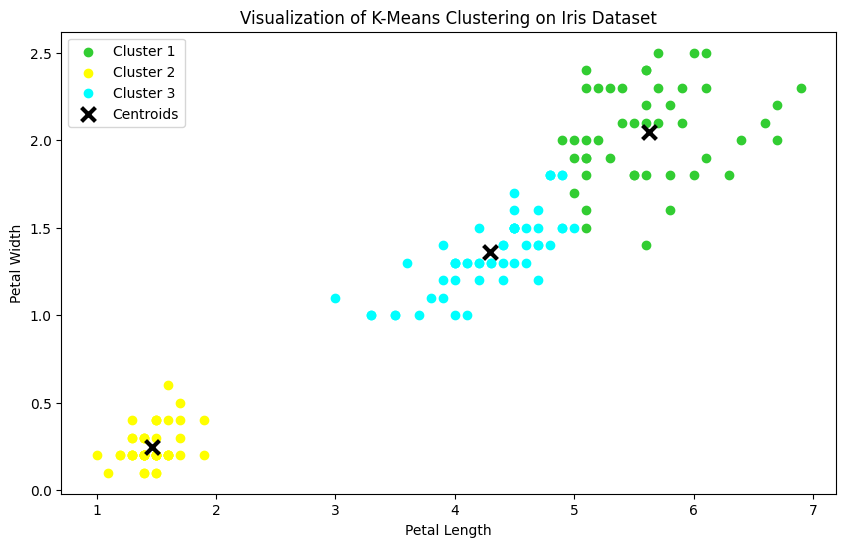

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['limegreen', 'yellow', 'cyan']

# Plot each cluster
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], s=100, color='black', marker='x', linewidths=3, label='Centroids')
plt.title('Visualization of K-Means Clustering on Iris Dataset')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


**Step 4: Exploring Different Cluster Configurations**

1. Automatic Iteration Over Multiple k Values: This will allow for a systematic analysis of how the number of clusters affects the clustering performance, measured by the Sum of Squared Errors (SSE) and the Silhouette Coefficient.

2. Plotting of Metrics: We will create plots to visualize the SSE and Silhouette scores across different k values to help identify the optimal number of clusters.

3. Using All Features: To fully explore the dataset, clustering will be executed using all four features of the Iris dataset, not just two.



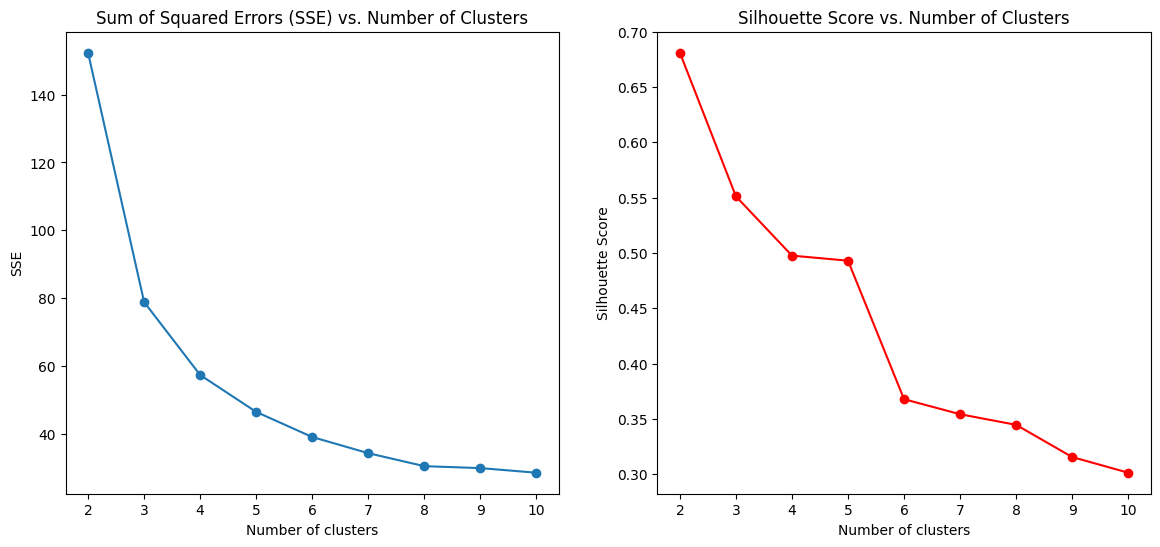

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
iris = load_iris()
X = iris.data  # Using all features now
Y = iris.target

# Parameters
max_clusters = 10  # Maximum number of clusters to test
sse = []
silhouette_scores = []

# Clustering over a range of k values
for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Calculate SSE for the current number of clusters
    sse_current = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
    sse.append(sse_current)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# SSE Plot
ax1.plot(range(2, max_clusters+1), sse, marker='o')
ax1.set_title('Sum of Squared Errors (SSE) vs. Number of Clusters')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE')

# Silhouette Score Plot
ax2.plot(range(2, max_clusters+1), silhouette_scores, marker='o', color='r')
ax2.set_title('Silhouette Score vs. Number of Clusters')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()


## 2.2 Application to the dataset xV.mat

**Step 1: Loading the dataset xV**


In [ ]:
import scipy.io
import numpy as np

# Load the dataset from the 'xV.mat' file
mat_file = scipy.io.loadmat('xV.mat')
xV = np.array(mat_file['xV'])


**Step 2: Clustering with the first two features**

This step involves applying k-means clustering using the first two features of the dataset and calculating the Sum of Squared Errors (SSE).



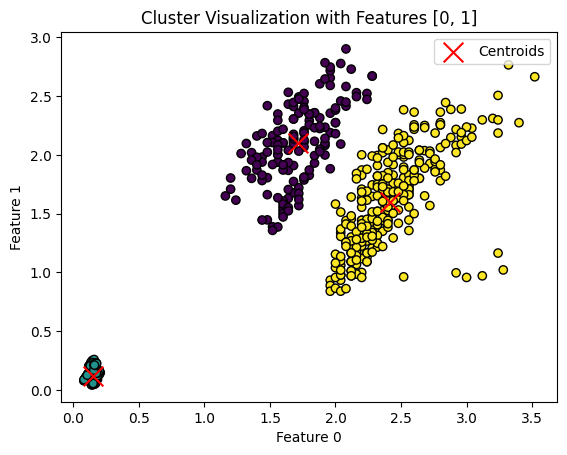

Sum of Squared Errors (SSE) for clustering with features [0, 1]: 99.45


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the first two features for clustering
X = xV[:, [0, 1]]
k = 3  # Number of clusters

# Execute K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
IDX = kmeans.labels_
C = kmeans.cluster_centers_
sse = kmeans.inertia_

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(C[:, 0], C[:, 1], s=200, color='red', marker='x', label="Centroids")
plt.title('Cluster Visualization with Features [0, 1]')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

print(f"Sum of Squared Errors (SSE) for clustering with features [0, 1]: {sse:.2f}")


**Step 3: Clustering with features [296, 305]**

This step repeats the clustering process using a different pair of features, [296, 305], to examine how feature selection impacts the clustering outcome.



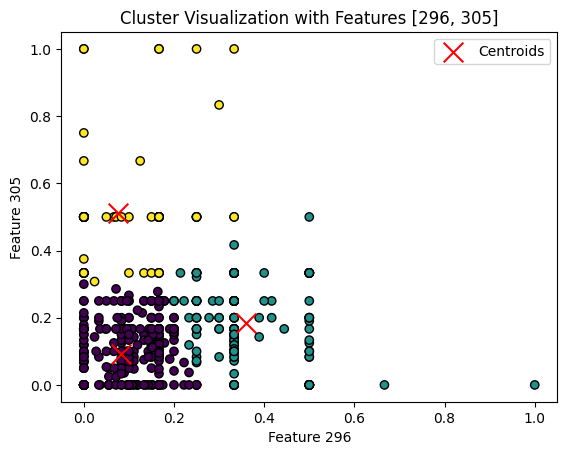

Sum of Squared Errors (SSE) for clustering with features [296, 305]: 11.40


In [ ]:
# Select features [296, 305] for clustering
X = xV[:, [296, 305]]

# Execute K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
IDX = kmeans.labels_
C = kmeans.cluster_centers_
sse = kmeans.inertia_

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(C[:, 0], C[:, 1], s=200, color='red', marker='x', label="Centroids")
plt.title('Cluster Visualization with Features [296, 305]')
plt.xlabel('Feature 296')
plt.ylabel('Feature 305')
plt.legend()
plt.show()

print(f"Sum of Squared Errors (SSE) for clustering with features [296, 305]: {sse:.2f}")


**Step 4: Clustering with the last two features of the xV matrix**

In this step, you will apply k-means clustering using the last two features of the dataset xV. This allows you to observe how clustering performs with different feature selections that might capture other aspects of the data.

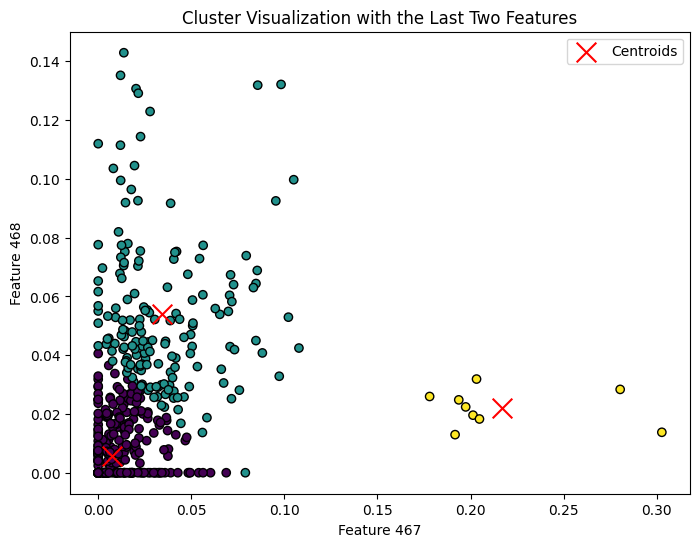

Sum of Squared Errors (SSE) for clustering with the last two features: 0.33


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the last two features for clustering
last_index = xV.shape[1]  # Get the number of features
X = xV[:, [last_index-2, last_index-1]]
k = 3  # Number of clusters

# Execute K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
IDX = kmeans.labels_
C = kmeans.cluster_centers_
sse = kmeans.inertia_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(C[:, 0], C[:, 1], s=200, color='red', marker='x', label="Centroids")
plt.title('Cluster Visualization with the Last Two Features')
plt.xlabel(f'Feature {last_index-2}')
plt.ylabel(f'Feature {last_index-1}')
plt.legend()
plt.show()

print(f"Sum of Squared Errors (SSE) for clustering with the last two features: {sse:.2f}")


**Step 5: Clustering with the characteristics [205, 175] of table xV**

In this step, you will apply k-means clustering using the features at indices 205 and 175 of the dataset xV. This step will allow you to see how different, potentially less correlated features affect the clustering outcome.

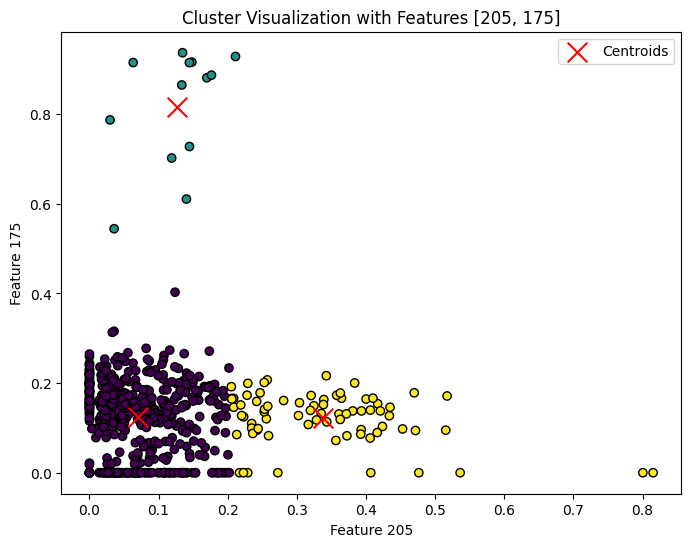

Sum of Squared Errors (SSE) for clustering with features [205, 175]: 6.37


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features [205, 175] for clustering
X = xV[:, [205, 175]]
k = 3  # Number of clusters

# Execute K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
IDX = kmeans.labels_
C = kmeans.cluster_centers_
sse = kmeans.inertia_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(C[:, 0], C[:, 1], s=200, color='red', marker='x', label="Centroids")
plt.title('Cluster Visualization with Features [205, 175]')
plt.xlabel('Feature 205')
plt.ylabel('Feature 175')
plt.legend()
plt.show()

print(f"Sum of Squared Errors (SSE) for clustering with features [205, 175]: {sse:.2f}")


**Step 6: Comparison of the results of steps 2, 4 and 5**

Now, let's compare the clustering results from Steps 2, 4, and 5 using the visualizations you have provided. We'll assess the cluster formation, the placement of centroids, and any other notable differences across different feature pairs.

**Observations from the Visualizations:**
1. **Step 2 (Features [0, 1]):**
   - **Clusters:** Appear to be well-separated, with distinct groups in the visualization.
   - **Centroids:** Are centrally located within each cluster, indicating good cluster cohesion.

2. **Step 4 (Last Two Features):**
   - **Clusters:** Show some overlap between the clusters, particularly between the cyan and purple clusters.
   - **Centroids:** Centroids are still relatively central but the overlap suggests less distinct separations between some clusters.

3. **Step 5 (Features [205, 175]):**
   - **Clusters:** This set shows a clear separation similar to Step 2, with well-defined clusters.
   - **Centroids:** Centroids are well-placed centrally, indicating effective clustering with these features.

**Comparative Analysis:**
- **Cluster Separation:** Features [0, 1] and [205, 175] provide better separation of clusters compared to the last two features. This might indicate that the former feature pairs capture more relevant or discriminative information for clustering this dataset.
- **Centroid Placement:** Centroids in Steps 2 and 5 are more effectively central within the clusters, suggesting that the features used in these steps may correspond to more meaningful or natural groupings within the dataset.
- **Cluster Cohesion and Separation:** Clusters in Steps 2 and 5 exhibit higher cohesion and separation than those in Step 4, which might suggest that the features used in Steps 2 and 5 are more suitable for distinguishing between the different groups in the dataset.

**Conclusion:**
From the comparison, it appears that using features [0, 1] and [205, 175] results in more effective clustering in terms of both visual separability and the placement of centroids. This suggests that these features might be capturing more relevant underlying patterns or groupings in the data compared to the last two features.

It would be beneficial to further investigate why certain features perform better by examining the nature of these features, their scale, and their distributions. Additionally, performing statistical tests or using other clustering validation metrics might provide deeper insights into the quality of the clusters formed with different feature sets.

# Part 3 : Density-based clustering with DBSCAN


## 3.1. Application to the mydata dataset


**Step 1: Loading the 'mydata'** dataset


In [ ]:
import scipy.io
import numpy as np

# Load the dataset from the 'mydata.mat' file
mat_file = scipy.io.loadmat('mydata.mat')
X = np.array(mat_file['X'])


**Step 2: Execute the DBSCAN method**


In this step, you will execute the DBSCAN clustering algorithm on the first two dimensions of your data array X. The parameters eps (epsilon) and min_samples define the radius within which to search for additional core points and the minimum number of points required to form a dense region, respectively.

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the first two dimensions of X with specified eps and MinPts
dbscan = DBSCAN(eps=0.5, min_samples=15).fit(X[:, :2])
IDX = dbscan.labels_  # Labels of the clusters


**Step 3: Plotting on a scatter plot the values of the two dimensions of the X-table**

This step involves creating a scatter plot to visualize the two-dimensional data points from your dataset.

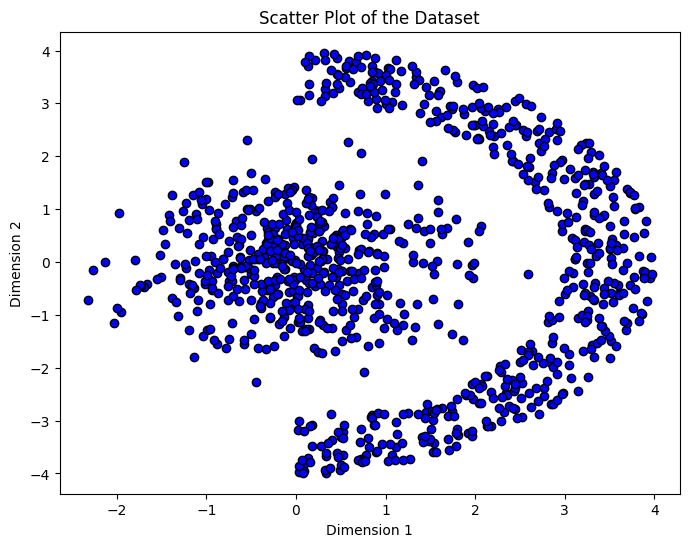

In [ ]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k')
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


**Step 4: Presentation in a second graph of the clusters and noise**


Finally, you will visualize the clusters identified by DBSCAN, including noise points. Noise points are typically labeled with -1 in the labels array IDX.

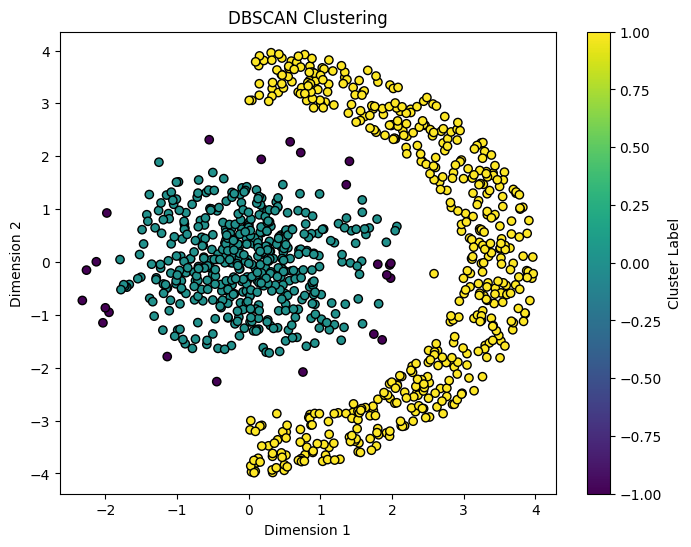

In [ ]:
# Plot the clusters and noise identified by DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


## 3.2. Eφαρμογή στο σύνολο δεδομένων Iris

**Step 1: Loading the Iris dataset**

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
meas = iris.data
X = meas[:, [2, 3]]  # Use only the petal length and petal width


**Step 2: Execute the DBSCAN method**

In [ ]:
from sklearn.cluster import DBSCAN

# Parameters for DBSCAN
epsilon = 0.1
MinPts = 5

# Execute DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=MinPts).fit(X)
IDX = dbscan.labels_  # Get cluster labels


**Step 3: Plotting on a scatter plot the values of the two dimensions of the X-table**

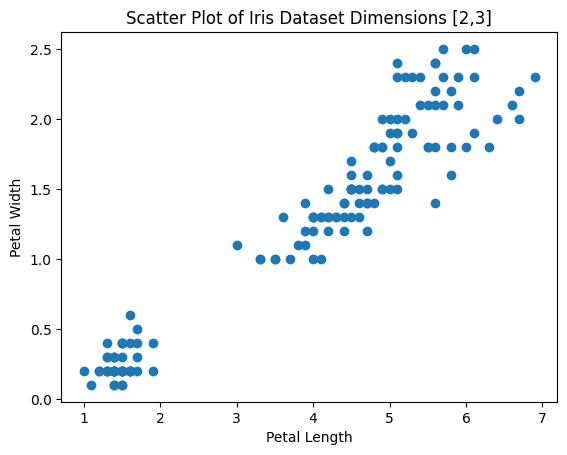

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter Plot of Iris Dataset Dimensions [2,3]')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


**Step 4: Presentation in a second graph of the clusters and noise**

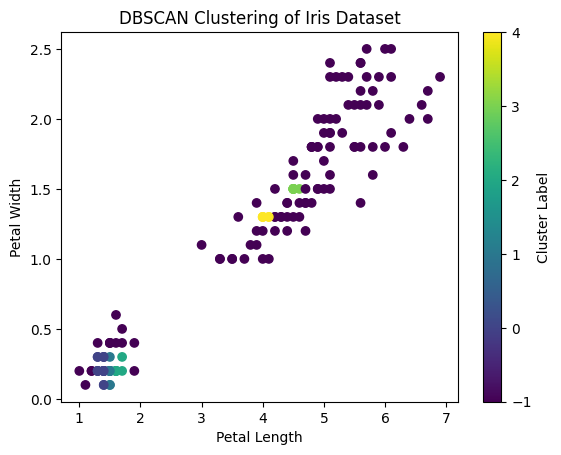

In [ ]:
# Plotting the clusters and noise identified by DBSCAN
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=IDX, cmap='viridis')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster Label')
plt.show()


**Step 5: Normalize data and repeat the process**

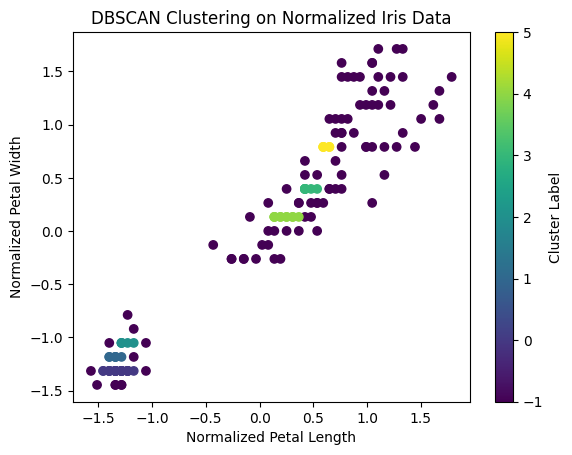

In [ ]:
from scipy.stats import zscore
import numpy as np

# Normalize the data using z-score
xV1 = zscore(X[:, 0])
xV2 = zscore(X[:, 1])
Xnew = np.transpose(np.array([xV1, xV2]))

# Execute DBSCAN on the normalized data
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(Xnew)
IDX = dbscan.labels_

# Plotting the clusters and noise on normalized data
plt.figure()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=IDX, cmap='viridis')
plt.title('DBSCAN Clustering on Normalized Iris Data')
plt.xlabel('Normalized Petal Length')
plt.ylabel('Normalized Petal Width')
plt.colorbar(label='Cluster Label')
plt.show()

Commentary of the result

Before Normalization: The clusters might not be well-separated if the scale of the dimensions varies widely.
After Normalization: Normalizing the data ensures that each dimension contributes equally to the distance computation, which can lead to a different clustering structure, possibly with better-defined clusters. Normalization is particularly effective for DBSCAN, which relies on distance measures to determine cluster membership.

## 3.3. Application to the dataset xV.mat

**Step 1: Load the dataset xV**

In [ ]:
import scipy.io
import numpy as np

# Load the dataset from the 'xV.mat' file
mat_file = scipy.io.loadmat('xV.mat')
xV = np.array(mat_file['xV'])


**Step 2: Run DBSCAN for the first two dimensions with e=0.3 and MinPts=50**

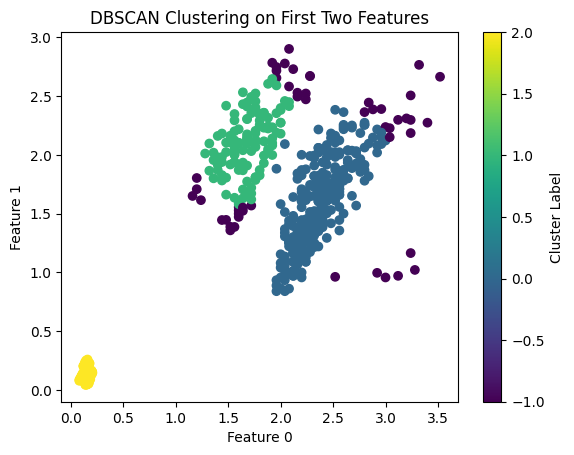

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN to the first two features with specified eps and MinPts
dbscan = DBSCAN(eps=0.3, min_samples=50).fit(xV[:, [0, 1]])
IDX = dbscan.labels_

# Visualize the clustering
plt.figure()
plt.scatter(xV[:, 0], xV[:, 1], c=IDX, cmap='viridis')
plt.title('DBSCAN Clustering on First Two Features')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Cluster Label')
plt.show()


**Step 3: Run DBSCAN with different values of e and MinPts for the first two dimensions**

Adjusting ε and MinPts can significantly impact the clusters formed, particularly in how sensitive the algorithm is to noise and the density required to form a cluster.


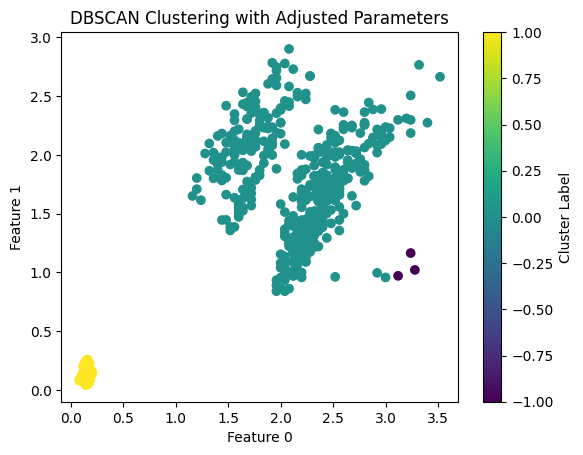

In [ ]:
# Apply DBSCAN with different parameters
dbscan = DBSCAN(eps=0.6, min_samples=43).fit(xV[:, [0, 1]])
IDX = dbscan.labels_

# Visualize the clustering with new parameters
plt.figure()
plt.scatter(xV[:, 0], xV[:, 1], c=IDX, cmap='viridis')
plt.title('DBSCAN Clustering with Adjusted Parameters')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Cluster Label')
plt.show()

**Step 4: Run DBSCAN for the last two dimensions with different values of e and MinPts**

This step examines how the clustering results vary when using different features of the dataset.

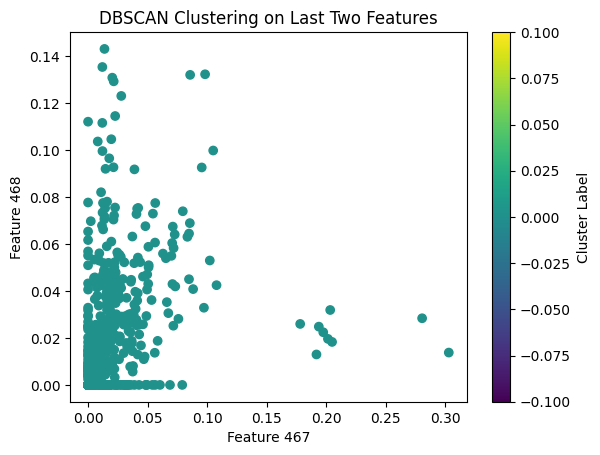

In [ ]:
# Apply DBSCAN to the last two features with new parameters
last_index = xV.shape[1]
dbscan = DBSCAN(eps=0.8, min_samples=30).fit(xV[:, [last_index-2, last_index-1]])
IDX = dbscan.labels_

# Visualize the clustering on the last two features
plt.figure()
plt.scatter(xV[:, last_index-2], xV[:, last_index-1], c=IDX, cmap='viridis')
plt.title('DBSCAN Clustering on Last Two Features')
plt.xlabel(f'Feature {last_index-2}')
plt.ylabel(f'Feature {last_index-1}')
plt.colorbar(label='Cluster Label')
plt.show()